In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
df=pd.read_csv("indian_multi_insurance_fraud_dataset.csv")

df.head()

,insurance_type,policy_term,insured_sex,insured_age,insured_occupation,policy_state,policy_city,policy_annual_premium,policy_start_date,claim_filing_date,...,accident_location,third_party_involved,property_type,crop_type,weather_condition,previous_claims_count,policy_renewal_status,premium_payment_delays,coverage_changes_before_claim,fraud_reported
0,property,5 years,M,29,Doctor,Karnataka,Mysore,64128,2022-12-03,2024-01-11,...,NaN,NaN,residential,NaN,NaN,5,Renewed,1-15 days,Decreased,0
1,life,1 year,F,56,Salesperson,Delhi,Dwarka,59326,2022-08-23,2023-09-24,...,NaN,NaN,NaN,NaN,NaN,4,Lapsed,>30 days,No Change,1
2,automobile,10 years,M,53,Retired,Karnataka,Bangalore,140231,2020-12-08,2022-06-22,...,95/26\nDugar Zila\nAmbattur-764845,No,NaN,NaN,NaN,1,Lapsed,NaN,No Change,1
3,automobile,5 years,F,20,Salesperson,Uttar Pradesh,Varanasi,196374,2023-10-12,2025-07-21,...,H.No. 459\nBhavsar Path\nMorbi 621929,No,NaN,NaN,NaN,5,Renewed,>30 days,Increased,1
4,crop,10 years,M,18,Engineer,Gujarat,Vadodara,15047,2021-10-08,2022-01-08,...,NaN,NaN,NaN,sugarcane,flood,5,Lapsed,15-30 days,No Change,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   insurance_type                     17000 non-null  object 
 1   policy_term                        17000 non-null  object 
 2   insured_sex                        17000 non-null  object 
 3   insured_age                        17000 non-null  int64  
 4   insured_occupation                 17000 non-null  object 
 5   policy_state                       17000 non-null  object 
 6   policy_city                        17000 non-null  object 
 7   policy_annual_premium              17000 non-null  int64  
 8   policy_start_date                  17000 non-null  object 
 9   claim_filing_date                  17000 non-null  object 
 10  incident_date                      17000 non-null  object 
 11  incident_time                      17000 non-null  obj

In [87]:
df.isnull().sum()

insurance_type                           0
policy_term                              0
insured_sex                              0
insured_age                              0
insured_occupation                       0
policy_state                             0
policy_city                              0
policy_annual_premium                    0
policy_start_date                        0
claim_filing_date                        0
incident_date                            0
incident_time                            0
claim_type                               0
claim_amount                             0
sum_insured                              0
claim_amount_to_sum_insured_ratio        0
claim_duration_days                  12164
hospital_name                        12164
treatment_details                    14557
nominee_relationship                 14595
auto_make                            14502
auto_model                           14502
auto_year                            14502
accident_lo

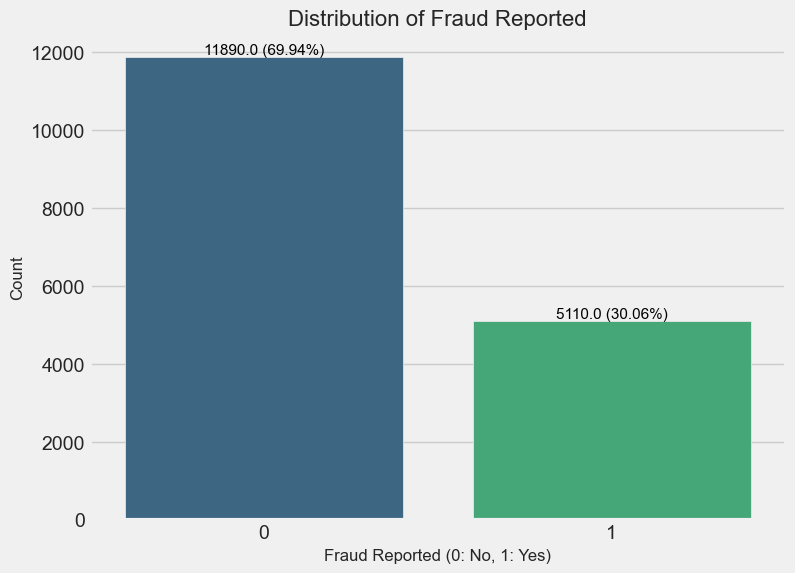

Created new features from dates:
 'policy_age_at_incident_days', 'claim_filing_delay_days', 'incident_month', 'incident_day_of_week'


Handled missing values strategically.

Remaining missing values check:
0
Successfully encoded 'premium_payment_delays' ordinally.



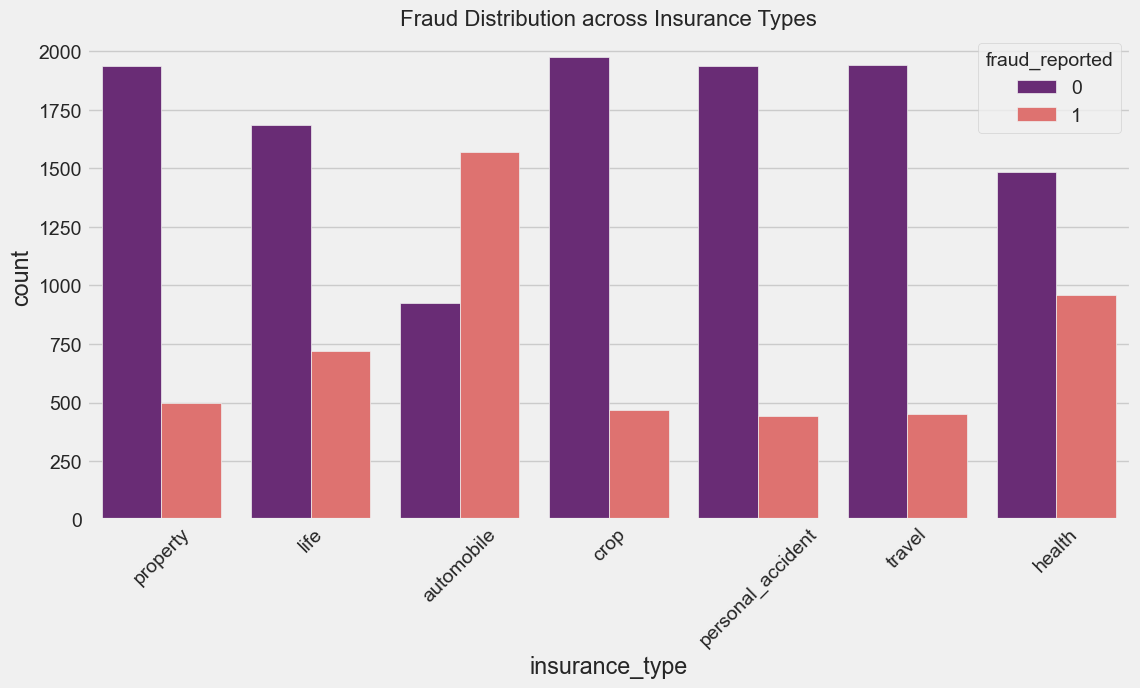

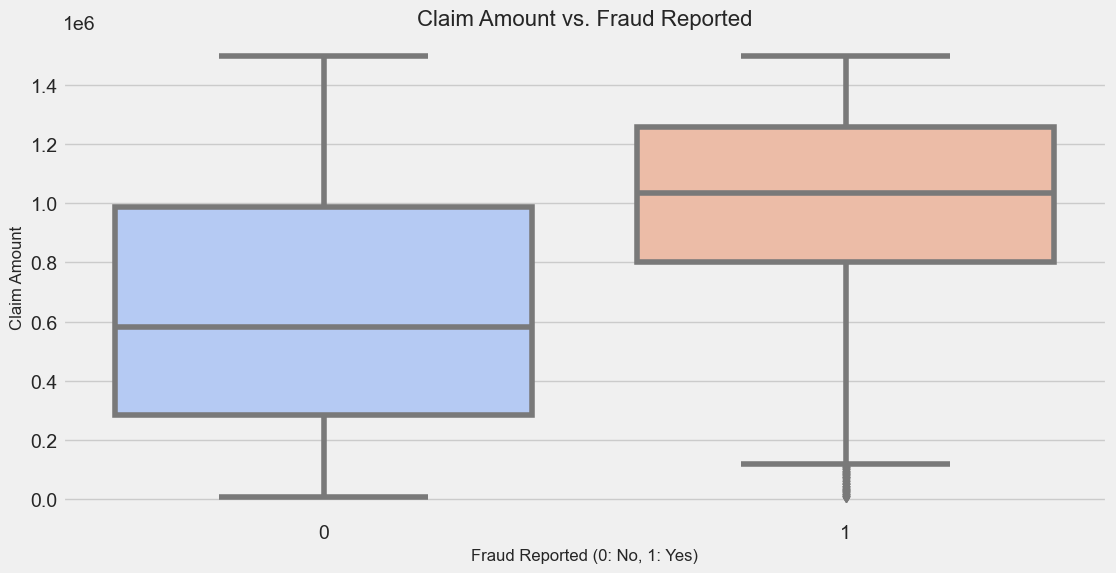

Dropped 9 columns. Remaining columns in X: 28

Applied One-Hot Encoding to categorical features.
Shape of final features matrix (X_encoded): (17000, 65)

Data successfully split into training and testing sets:
X_train shape: (13600, 65)
X_test shape: (3400, 65)
y_train shape: (13600,)
y_test shape: (3400,)


In [88]:
# --- 1. Target Variable Analysis ---
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraud_reported', data=df, palette='viridis')
plt.title('Distribution of Fraud Reported', fontsize=16)
plt.xlabel('Fraud Reported (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height()/len(df)*100:.2f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.show()


# --- 2. Feature Engineering: Dates ---
df['policy_start_date'] = pd.to_datetime(df['policy_start_date'])
df['claim_filing_date'] = pd.to_datetime(df['claim_filing_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

df['policy_age_at_incident_days'] = (df['incident_date'] - df['policy_start_date']).dt.days
df['claim_filing_delay_days'] = (df['claim_filing_date'] - df['incident_date']).dt.days

df['incident_month'] = df['incident_date'].dt.month
df['incident_day_of_week'] = df['incident_date'].dt.dayofweek 

print("Created new features from dates:\n 'policy_age_at_incident_days', 'claim_filing_delay_days', 'incident_month', 'incident_day_of_week'\n")


# --- 3. Handling Missing Values Strategically ---
insurance_specific_cols = [
    'claim_duration_days', 'hospital_name', 'treatment_details', 'nominee_relationship',
    'auto_make', 'auto_model', 'auto_year', 'accident_location', 'third_party_involved',
    'property_type', 'crop_type', 'weather_condition'
]
for col in insurance_specific_cols:
    if df[col].dtype == 'object':
        df[col].fillna('None', inplace=True)
    else:
        df[col].fillna(0, inplace=True) 

df['premium_payment_delays'] = pd.to_numeric(df['premium_payment_delays'], errors='coerce').fillna(0).astype(int)
print("\nHandled missing values strategically.\n")
print("Remaining missing values check:")
print(df.isnull().sum().sum()) 


# --- 4. Ordinal Encoding for 'premium_payment_delays' ---
df['premium_payment_delays'].fillna('No Delay', inplace=True)
delay_mapping = {
    'No Delay': 0,
    '1-15 days': 1,
    '15-30 days': 2,
    '>30 days': 3
}
df['premium_payment_delays_encoded'] = df['premium_payment_delays'].map(delay_mapping)
print("Successfully encoded 'premium_payment_delays' ordinally.\n")


# --- 5. Exploratory Visualization ---
df['fraud_reported'] = df['fraud_reported'].astype(str)  
plt.figure(figsize=(12, 6))
sns.countplot(x='insurance_type', hue='fraud_reported', data=df, palette='magma')
plt.title('Fraud Distribution across Insurance Types', fontsize=16)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fraud_reported'], y='claim_amount', data=df, palette='coolwarm')
plt.title('Claim Amount vs. Fraud Reported', fontsize=16)
plt.xlabel('Fraud Reported (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.show()


# --- 6. Feature Selection and Final Data Preparation ---
y = df['fraud_reported'].astype(int) 
X = df.drop('fraud_reported', axis=1)

cols_to_drop = [
    'policy_start_date', 'claim_filing_date', 'incident_date', 'incident_time',
    'policy_city', 'hospital_name', 'treatment_details', 'accident_location',
    'premium_payment_delays'
]
X = X.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns. Remaining columns in X: {X.shape[1]}\n")


# --- 7. One-Hot Encoding for remaining categorical variables ---
X_encoded = pd.get_dummies(X, drop_first=True)
print("Applied One-Hot Encoding to categorical features.")
print(f"Shape of final features matrix (X_encoded): {X_encoded.shape}")


# --- 8. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42, stratify=y
)

print("\nData successfully split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Checking for NaNs in X_train before fitting... Found 13600 NaN values.

Training the robust XGBoost model pipeline...
Training complete! 

Accuracy Score: 95.91%

--- Confusion Matrix ---


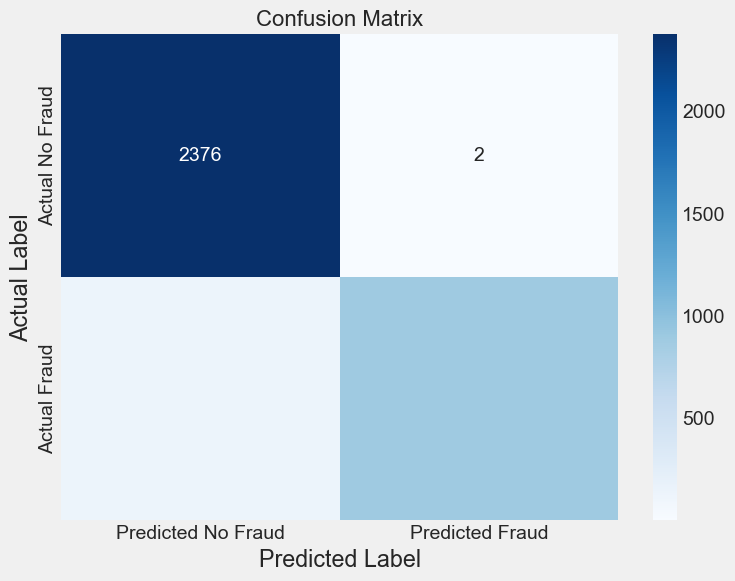


--- Classification Report ---
              precision    recall  f1-score   support

No Fraud (0)       0.95      1.00      0.97      2378
   Fraud (1)       1.00      0.87      0.93      1022

    accuracy                           0.96      3400
   macro avg       0.97      0.93      0.95      3400
weighted avg       0.96      0.96      0.96      3400



In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
import numpy as np

nan_check = np.isnan(X_train).sum()
print(f"Checking for NaNs in X_train before fitting... Found {nan_check.sum()} NaN values.\n")


# --- 1. Create the MORE ROBUST Model Pipeline ---
# Step 1: Impute any remaining NaNs with the median value of each column.
# Step 2: Apply SMOTE to balance the data.
# Step 3: Train XGBClassifier.

pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])


# --- 2. Train the Model ---
print("Training the robust XGBoost model pipeline...")
pipeline.fit(X_train, y_train)
print("Training complete! \n")


# --- 3. Make Predictions on the Test Set ---
y_pred = pipeline.predict(X_test)


# --- 4. Evaluate the Model's Performance ---
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Fraud', 'Predicted Fraud'], 
            yticklabels=['Actual No Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Fraud (0)', 'Fraud (1)']))

Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuning complete!

Best parameters found by the search:
{'xgb__subsample': 0.9, 'xgb__n_estimators': 300, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.9}

Best F1-score during cross-validation:
0.9360

--- Evaluating the tuned model on the test set ---

 Tuned Accuracy Score: 95.94%

--- Tuned Confusion Matrix ---


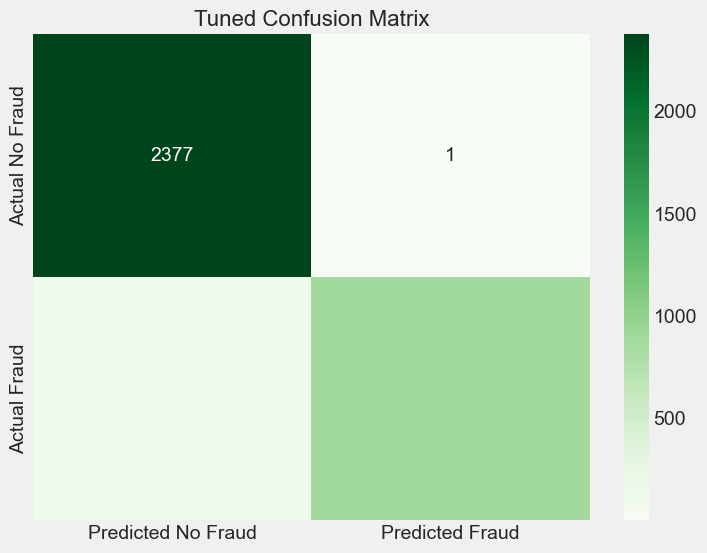


--- Tuned Classification Report ---
              precision    recall  f1-score   support

No Fraud (0)       0.95      1.00      0.97      2378
   Fraud (1)       1.00      0.87      0.93      1022

    accuracy                           0.96      3400
   macro avg       0.97      0.93      0.95      3400
weighted avg       0.96      0.96      0.96      3400



In [90]:
from sklearn.model_selection import RandomizedSearchCV

# --- 1. Define the Hyperparameter Grid ---
param_grid = {
    'xgb__n_estimators': [100, 200, 300, 400],
    'xgb__max_depth': [3, 4, 5, 6, 8],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'xgb__gamma': [0, 0.1, 0.2]
}

# --- 2. Set up and Run the Randomized Search ---

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("Starting hyperparameter tuning with RandomizedSearchCV...")
random_search.fit(X_train, y_train)
print("Tuning complete!\n")

# --- 3. Display the Best Parameters Found ---
print("Best parameters found by the search:")
print(random_search.best_params_)
print("\nBest F1-score during cross-validation:")
print(f"{random_search.best_score_:.4f}")

# --- 4. Evaluate the BEST, Tuned Model on the Test Set ---
print("\n--- Evaluating the tuned model on the test set ---")
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# New Accuracy Score
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\n Tuned Accuracy Score: {accuracy_tuned * 100:.2f}%")

# New Confusion Matrix
print("\n--- Tuned Confusion Matrix ---")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted No Fraud', 'Predicted Fraud'],
            yticklabels=['Actual No Fraud', 'Actual Fraud'])
plt.title('Tuned Confusion Matrix', fontsize=16)
plt.show()

# New Classification Report
print("\n--- Tuned Classification Report ---")
print(classification_report(y_test, y_pred_tuned, target_names=['No Fraud (0)', 'Fraud (1)']))

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# --- 1. Define the models we want to benchmark ---

# Simple Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# AdaBoost
ada = AdaBoostClassifier(random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Voting Classifier
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb_base)],
    voting='soft' 
)


# --- 2. Creating a dictionary of models for easy iteration ---
models = {
    "Decision Tree": dt,
    "AdaBoost": ada,
    "Random Forest": rf,
    "Voting Classifier": voting_clf
}


# --- 3. Looping through, training, and evaluate each model ---
for name, model in models.items():
    
    
    pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('smote', SMOTE(random_state=42)),
        (name.lower().replace(" ", "_"), model) 
    ])
    
    print(f"--- Training {name} ---")
    pipeline.fit(X_train, y_train)
    
    y_pred_new = pipeline.predict(X_test)
    
    print(f"--- Classification Report for {name} ---")
    print(classification_report(y_test, y_pred_new, target_names=['No Fraud (0)', 'Fraud (1)']))
    print("="*60 + "\n")

--- Training Decision Tree ---
--- Classification Report for Decision Tree ---
              precision    recall  f1-score   support

No Fraud (0)       0.94      0.93      0.94      2378
   Fraud (1)       0.85      0.87      0.86      1022

    accuracy                           0.92      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.92      0.92      0.92      3400


--- Training AdaBoost ---
--- Classification Report for AdaBoost ---
              precision    recall  f1-score   support

No Fraud (0)       0.90      0.94      0.92      2378
   Fraud (1)       0.84      0.76      0.80      1022

    accuracy                           0.88      3400
   macro avg       0.87      0.85      0.86      3400
weighted avg       0.88      0.88      0.88      3400


--- Training Random Forest ---
--- Classification Report for Random Forest ---
              precision    recall  f1-score   support

No Fraud (0)       0.94      1.00      0.97      2378
   Fraud

Fitting Decision Tree...
Fitting AdaBoost...
Fitting Random Forest...
Fitting Tuned XGBoost...

All models have been evaluated.

--- Model Performance Summary Table ---


,Training Accuracy,Testing Accuracy,Fraud Precision,Fraud Recall,Fraud F1-Score
Model,,,,,
Decision Tree,1.0000,0.9150,0.8500,0.8708,0.8603
AdaBoost,0.8876,0.8844,0.8400,0.7603,0.7982
Random Forest,1.0000,0.9591,1.0000,0.8640,0.9270
Tuned XGBoost,0.9677,0.9594,0.9989,0.8659,0.9277


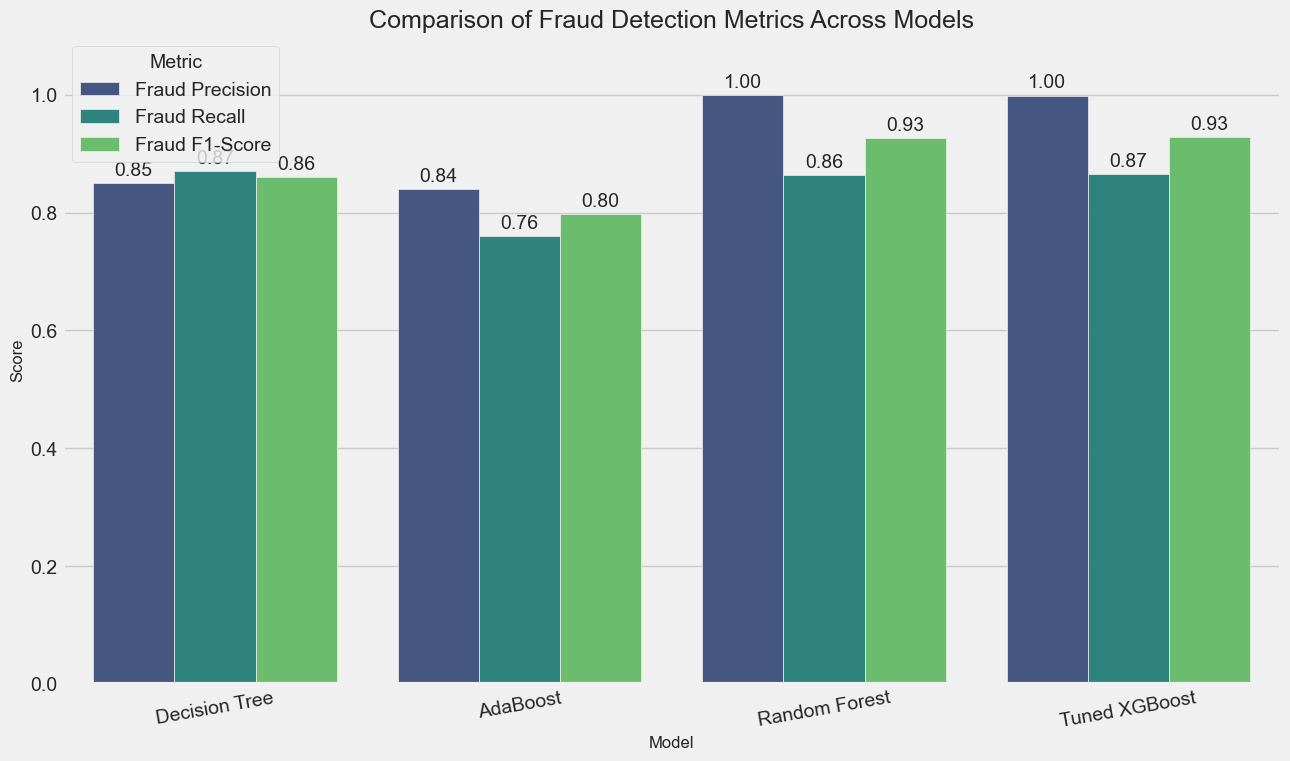

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. Set up Models for Final Comparison ---
best_xgb_params = random_search.best_params_
best_xgb_params_clean = {key.replace('xgb__', ''): value for key, value in best_xgb_params.items()}

tuned_xgb = XGBClassifier(**best_xgb_params_clean, random_state=42, use_label_encoder=False, eval_metric='logloss')

models_for_comparison = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Tuned XGBoost": tuned_xgb # Our best model
}

# --- 2. Train, Evaluate, and Store Results ---
results = []

for name, model in models_for_comparison.items():
    
    # Build the full pipeline for each model
    pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('smote', SMOTE(random_state=42)),
        (name.lower().replace(" ", "_"), model)
    ])
    
    print(f"Fitting {name}...")
    pipeline.fit(X_train, y_train)
    
    # Get Training Accuracy
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Get Testing Predictions and Metrics
    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the results
    results.append({
        "Model": name,
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy,
        "Fraud Precision": precision,
        "Fraud Recall": recall,
        "Fraud F1-Score": f1
    })

print("\nAll models have been evaluated.")

# --- 3. Display the Results Table ---
results_df = pd.DataFrame(results).set_index("Model")
styled_df = results_df.style.background_gradient(cmap='Greens').format("{:.4f}")
print("\n--- Model Performance Summary Table ---")
display(styled_df)


# --- 4. Create the Comparison Bar Chart ---
results_to_plot = results_df[['Fraud Precision', 'Fraud Recall', 'Fraud F1-Score']].reset_index()
melted_df = results_to_plot.melt('Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=melted_df, palette="viridis")

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Comparison of Fraud Detection Metrics Across Models', fontsize=18)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=10)
plt.legend(title='Metric')
plt.ylim(0, 1.1) 
plt.show()

In [93]:
import shap
import joblib
import pandas as pd
from sklearn.impute import SimpleImputer

# --- 1. Finalize and Train our Model ---
best_xgb_params = random_search.best_params_
best_xgb_params_clean = {key.replace('xgb__', ''): value for key, value in best_xgb_params.items()}
tuned_xgb = XGBClassifier(**best_xgb_params_clean, random_state=42, use_label_encoder=False, eval_metric='logloss')

final_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(random_state=42)),
    ('model', tuned_xgb) 
])

print("Training the final model pipeline...")
final_pipeline.fit(X_train, y_train)
print("Final model is ready.")


# --- 2. Create the SHAP Explainer ---
trained_model = final_pipeline.named_steps['model']
explainer = shap.TreeExplainer(trained_model)


X_test_processed = final_pipeline.named_steps['imputer'].transform(X_test)

feature_names = final_pipeline.named_steps['imputer'].get_feature_names_out()
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

shap_values = explainer.shap_values(X_test_processed_df)
print("SHAP values calculated.")

# --- 3. Pipeline and Explainer for the Web App ---
joblib.dump(final_pipeline, 'fraud_model_pipeline.joblib')
joblib.dump(explainer, 'shap_explainer.joblib')

print("\nModel pipeline and SHAP explainer have been saved successfully!")

Training the final model pipeline...
Final model is ready.
SHAP values calculated.

Model pipeline and SHAP explainer have been saved successfully!
